<a href="https://colab.research.google.com/github/NehaSrinivas98/MachineLearningCourse/blob/main/pandasNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=CMEWVn1uZpQ&t=72s

# **1.Pandas**
Pandas is an open-source Python library widely used for data manipulation and analysis. It provides powerful and flexible data structures, particularly Series and DataFrames, that make working with "relational" or "labeled" data intuitive and efficient.

###a. Pandas/Python vs Excel
  1. Excel can handle 1 million rows Pandas/Python can handle millions and millions of rows
  2. Pandas/Python can handle complex data structure when compared to excel
  3. Pandas/Python is good for automation where as excel is not automatable.
  4. Pandas/Python has cross compatibility where as excel does not.

###b. Arrays
* 1D array : Series
* 2D array: Dataframe

###c.Dataframe
  * A DataFrame in Python is a two-dimensional, labeled data structure provided by the pandas library. It is designed for data manipulation and analysis, resembling a table or spreadsheet with rows and columns.
  * Index starts with 0
  * Dataframe can store int,str,tuple etc
  * column names are also known as Features
  * Row values are also known as Observation
  * We will get errors when we try to store different data types data in same column.
  * Pandas vs Excel terminology

<table>
  <tr>
    <th>
      Excel
    </th>
    <th>
      Pandas
    </th>
  </tr>
  <tr>
    <td>
      Worksheet
    </td>
    <td>
      Dataframe
    </td>
  </tr>
  <tr>
    <td>
      Row heading
    </td>
    <td>
      Index
    </td>
  </tr>
  <tr>
    <td>
      Row
    </td>
    <td>
      Row
    </td>
  </tr>
  <tr>
    <td>
      Empty Cell
    </td>
    <td>
      Nan
    </td>
  </tr>
</table>

### d. Creating a dataframe

In [2]:
import pandas as pd
import numpy as np

##### i. Using Array

In [14]:
#1.Numpy
data = np.array([[1,4],[2,5],[3,6]])
df = pd.DataFrame(data,index=['row1','row2','row3'],
             columns=['col1','col2'])
print('df',df)
#accessing using at
print('value at row1 and col1',df.at['row1','col1'])
#accessing using iat
print('Value at row2 and col1',df.iat[2,1])

df       col1  col2
row1     1     4
row2     2     5
row3     3     6
value at row1 and col1 1
Value at row2 and col1 6


In [20]:
# converting the above dataframe to json
from io import StringIO
json_data = df.to_json()
print(type(json_data))
df_json = pd.read_json(StringIO(json_data))
print(df_json)

<class 'str'>
      col1  col2
row1     1     4
row2     2     5
row3     3     6


In [26]:
# Orient in to_json by default is index
df_json_1 = df.to_json()
print('df_json',df_json_1)

# 1. orient='records' in Pandas means the DataFrame is converted into a list of dictionaries where each dictionary represents one row.
#[
  #{column:value, column:value},
  #{column:value, column:value}
#]
df_json_records = df.to_json(orient='records')
print('df_json_records',df_json_records)
# Usecases
# a. Most APIs return data in this format
# b. Easy to convert between JSON ↔ DataFrame
# c. Very readable

#2.orient = 'index' means the DataFrame index becomes the main key in the JSON object, and each key contains the row data
#{
 #index : {column:value, column:value}
#}
df_json_index = df.to_json(orient='index')
print('df_json_index',df_json_index)

#3. orient = 'columns' means the JSON is structured by columns.Each column name becomes a key, and inside it you have index → value pairs.
df_json_columns = df.to_json(orient='columns')
print('df_json_columns',df_json_columns)
#{
 # column_name : {
  #    index : value
  #}
#}

#4.orient='values' in Pandas means the JSON will contain only the data values, without column names or index.
df_json_values = df.to_json(orient='values')
print('df_json_values',df_json_values)
#[
 #["Neha",25],
 #["Rahul",28]
#]

#5.orient='split' in Pandas means the JSON output is divided into three parts:
#columns → column names
#index → row index values
#data → actual values
df_json_split = df.to_json(orient='split')
print('df_json_values',df_json_split)
#{
 #"columns": [...],
 #"index": [...],
 #"data": [...]
#}




df_json {"col1":{"row1":1,"row2":2,"row3":3},"col2":{"row1":4,"row2":5,"row3":6}}
df_json_records [{"col1":1,"col2":4},{"col1":2,"col2":5},{"col1":3,"col2":6}]
df_json_1 {"row1":{"col1":1,"col2":4},"row2":{"col1":2,"col2":5},"row3":{"col1":3,"col2":6}}


In [ ]:
#2. List
data = [[1,4],[2,5],[3,6]]
pd.DataFrame(data,index=['row1','row2','row3'],
             columns=['col1','col2'])

,col1,col2
row1,1,4
row2,2,5
row3,3,6


In [5]:
#1D array
one_D_array = np.array([1,2,3,4,5,6])
print(one_D_array.ndim)
print(one_D_array.shape)
# blank space after , represents its a 1D array

1
(6,)


In [13]:
#Coverting 1D array to 2D array and 2 square brackets represents its a 2D array
# the original array is not impacted
two_D_array = one_D_array.reshape(2,3)
print('2D array ndim',two_D_array.ndim)
print('2D array',two_D_array)
print('1D array',one_D_array.ndim)
print('Array size',one_D_array.size)
print('No of bytes',one_D_array.itemsize)

2D array ndim 2
2D array [[1 2 3]
 [4 5 6]]
1D array 1
Array size 6
No of bytes 8


In [ ]:
#Array with ones
ones_array = np.ones((3,4))
ones_array

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
eye_array = np.eye(3)
eye_array

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
#Vectorized operations
arr1 = np.array([1,2,3,4,5])
arr2 = np.array([10,20,30,40,50])
print('Addition',arr1+arr2)
print('Subtraction',arr2-arr1)
print('Multiplication',arr1*arr2)
print('Division',arr2//arr1)

Addition [11 22 33 44 55]
Subtraction [ 9 18 27 36 45]
Multiplication [ 10  40  90 160 250]
Division [10 10 10 10 10]


In [20]:
#Universal functions
arr3 = np.array([4,9,16,25])
print('Sqrt',np.sqrt(arr3))
print('Exponential',np.exp(arr3))
print('Sin',np.sin(arr3))
print('Cos',np.cos(arr3))

Sqrt [2. 3. 4. 5.]
Exponential [5.45981500e+01 8.10308393e+03 8.88611052e+06 7.20048993e+10]
Sin [-0.7568025   0.41211849 -0.28790332 -0.13235175]
Cos [-0.65364362 -0.91113026 -0.95765948  0.99120281]


In [29]:
#Array slicing and indexing
arr4 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print('Array',arr4)
print('Row 0 column 2:',arr4[0][1])
print('Access 11,12,15,16',arr4[2:,2:])
print('Access 3,4,7,8',arr4[0:2, 2:4]) #rows 0 and 1  , columns 2 and 3 . Remember 2 and 4 are excluded

Array [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Row 0 column 2: 2
Access 11,12,15,16 []
Access 3,4,7,8 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [33]:
#Statistics
arr5 = np.array([1,2,3,4,5])
mean = np.mean(arr5)
print('Mean',mean)
print('Mode',np.std(arr5))
print('Variance',np.var(arr5))

Mean 3.0
Mode 1.4142135623730951
Variance 2.0


In [34]:
#Logical Operator
arr6 = np.array([1,2,3,4,5,6,7,8,9,10])
print(arr6[arr6>5])

[ 6  7  8  9 10]


##### ii. Using Dictionaries

In [ ]:
states = ['California','Texus','Florida','New York']
population = [1234,5678,9012,2345]
# storing lists within dictionaries
dict_state = {'States':states,'Population':population}
pd.DataFrame(dict_state)
df_population = pd.DataFrame(dict_state,index=[1,2,3,4])
print(df_population)

       States  Population
1  California        1234
2       Texus        5678
3     Florida        9012
4    New York        2345


##### iii. Csv

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import pandas as pd

# Replace with your actual path
file_path = '/content/drive/My Drive/Colab Notebooks/dataSet.csv'
df = pd.read_csv(file_path)

MessageError: Error: credential propagation was unsuccessful

### e. Displaying data in pandas

In [ ]:
import pandas as pd

# Create the dataset
data = {
    "Student_ID": [f"S{str(i).zfill(3)}" for i in range(1, 26)],

    "Name": [
        "Aarav Sharma", "Ananya Verma", "Rohan Patel", "Priya Singh", "Karan Mehta",
        "Sneha Iyer", "Arjun Rao", "Neha Kulkarni", "Vikram Joshi", "Pooja Nair",
        "Rahul Das", "Meera Kapoor", "Siddharth Jain", "Kavya Malhotra", "Amit Kumar",
        "Nisha Gupta", "Varun Bansal", "Isha Choudhary", "Manish Yadav", "Ritu Saxena",
        "Aditya Mishra", "Simran Kaur", "Mohit Aggarwal", "Ayesha Khan", "Tanmay Ghosh"
    ],

    "Age": [
        15, 14, 15, 14, 16, 15, 16, 14, 15, 16,
        15, np.nan, 16, 15, 17, 14, np.nan, 16, 15, 14,
        16, 15, np.nan, 14, 16
    ],

    "Gender": [
        "Male", "Female", "Male", "Female", "Male",
        "Female", "Male", "Female", "Male", "Female",
        "Male", "Female", "Male", "Female", "Male",
        "Female", "Male", "Female", "Male", "Female",
        "Male", "Female", "Male", "Female", "Male"
    ],

    "Class": [
        10, 9, 10, 9, 11, 10, 11, 9, 10, 11,
        10, 9, 11, 10, 12, 9, 11, 10, 10, 9,
        11, 10, 12, 9, 11
    ],

    "City": [
        "Delhi", "Mumbai", "Ahmedabad", "Lucknow", "Pune",
        "Chennai", "Bengaluru", "Nagpur", "Jaipur", "Kochi",
        "Kolkata", np.nan, "Indore", "Chandigarh", "Patna",
        "Noida", "Gurgaon", np.nan, "Bhopal", "Udaipur",
        "Allahabad", "Amritsar", "Faridabad", np.nan, "Ranchi"
    ],

    "Address": [
        "12A Green Park", "Sunrise Apartments", "Shree Nagar Society", "Alambagh Colony",
        "Baner Road", "Lake View Street", "Tech Park Residency", "Shanti Nagar",
        "Pink City Enclave", "Palm Grove",
        np.nan, "Lajpat Nagar", "Civil Lines", "Sector 22",
        "Rajendra Nagar", np.nan, "DLF Phase 3", "Model Town",
        "MP Nagar", "Hiran Magri",
        "Civil Lines", "GT Road", np.nan, "Park Street", "Main Road"
    ],

    "Math": [
        85, 92, 76, 88, 90, 95, 70, 82, 68, 89,
        75, 80, np.nan, 86, 91, 78, 84, 88, 73, np.nan,
        90, 87, 65, 72, 88
    ],

    "Science": [
        78, 89, 72, 91, 84, 93, 75, 80, 70, 87,
        74, np.nan, 85, 82, 90, 76, 88, 84, np.nan, 79,
        92, 86, 68, 71, 89
    ],

    "English": [
        88, 90, 70, 85, 86, 92, 73, 78, 65, 90,
        np.nan, 82, 88, 84, 89, 75, 81, 86, 77, 80,
        91, np.nan, 70, 74, 87
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Total and Average
df["Total"] = df["Math"] + df["Science"] + df["English"]
df["Average"] = df["Total"] / 3

# Display the DataFrame
print(df)


   Student_ID            Name   Age  Gender  Class        City  \
0        S001    Aarav Sharma  15.0    Male     10       Delhi   
1        S002    Ananya Verma  14.0  Female      9      Mumbai   
2        S003     Rohan Patel  15.0    Male     10   Ahmedabad   
3        S004     Priya Singh  14.0  Female      9     Lucknow   
4        S005     Karan Mehta  16.0    Male     11        Pune   
5        S006      Sneha Iyer  15.0  Female     10     Chennai   
6        S007       Arjun Rao  16.0    Male     11   Bengaluru   
7        S008   Neha Kulkarni  14.0  Female      9      Nagpur   
8        S009    Vikram Joshi  15.0    Male     10      Jaipur   
9        S010      Pooja Nair  16.0  Female     11       Kochi   
10       S011       Rahul Das  15.0    Male     10     Kolkata   
11       S012    Meera Kapoor   NaN  Female      9         NaN   
12       S013  Siddharth Jain  16.0    Male     11      Indore   
13       S014  Kavya Malhotra  15.0  Female     10  Chandigarh   
14       S

In [ ]:
df.head()#returns the first 5 rows

In [ ]:
df.tail() #returns the last 5 rows

In [ ]:
df.head(3) #displays first 3 rows

In [ ]:
df.tail(3) #displays last 3 rows

In [ ]:
df.shape

In [ ]:
pd.set_option('display.max_rows',None)
df

1.   pd.setOption() is used to configure Pandas to display all rows of a DataFrame when you print it in Google Colab (or any Python environment). By default, Pandas truncates the output if there are too many rows.
2.   it can be reset using pd.reset_option('display.max_rows')
*   display.width:           Width of the display in characters
*   display.max_colwidth :    Max width of each column (use None for unlimited)*   display.precision:      Number of decimal places for floats
*   display.float_format:   Format for floating point numbers (e.g., '{:.2f}'.format)
*   display.expand_frame_repr: Whether to print DataFrames across multiple lines
*   display.large_repr:       How large DataFrames are printed ('truncate' or 'info')
*   display.colheader_justify: Justification of column headers ('left', 'right', 'center')
*   display.show_dimensions:   Whether to show DataFrame shape info when printing
3. the second argument can be 'None' which means display all the rows or some number which represents the number of rows to be displayed

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.info

In [ ]:
df.describe()
#https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-describe-method/

In [ ]:
len(df)

In [ ]:
max(df) #In Python, the built-in max() function operates on the column labels, not on the data itself.
#It returns the maximum column name (lexicographically) by default, not based on non-null counts.
#Lexicographical order is basically dictionary order — the way words are ordered in a dictionary.
#For strings, Python compares characters from left to right using their Unicode/ASCII values.
#print("apple" < "banana")   # True, because 'a' < 'b'
#print("cat" < "car")        # False, because 't' > 'r'
#print("A" < "a")            # True, uppercase letters come before lowercase
#print("B" > "A")            # True

In [ ]:
print(df['Age'].min())  # returns the minimum value in price column applies for max as well
print(df.count().max()) # returns the number of max non null values
print(df.count()[df.count()==df.count().max()]) # returns the columns in the dataframe which has maximum non null values.

In [ ]:
print(df.index)
print(max(df.index))

In [ ]:
round(df,2)

In [ ]:
df['Address']

In [ ]:
type(df['Address'])

In [ ]:
df['Address'].index

In [ ]:
df.Math

In [ ]:
# advantage of using df['columnName'] over df.columnName is when the column name is having a space the second method is more convinient and we cannot select multiple columns using dot operator

#selecting the columns: order of the columns mentioned in the list is the order of the columns accessed.
# one pair of square brackets returns a series whereas 2 square brackets returns a data frame.
df[['Science','English']]

In [ ]:
type(df[['Math','English']])

### f. Adding a new column

##### i. With an array

In [ ]:
import numpy as np
#create an array of 25 elements
# np.arange(start,end,step)
roll_no = np.arange(1,26)
print(len(roll_no))

25


In [ ]:
df['Roll no'] = roll_no

In [ ]:
df

,Student_ID,Name,Age,Gender,Class,City,Address,Math,Science,English,Total,Average,Roll no
0,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,85.0,78.0,88.0,251.0,83.666667,1
1,S002,Ananya Verma,14.0,Female,9,Mumbai,Sunrise Apartments,92.0,89.0,90.0,271.0,90.333333,2
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,76.0,72.0,70.0,218.0,72.666667,3
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,88.0,91.0,85.0,264.0,88.000000,4
4,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,90.0,84.0,86.0,260.0,86.666667,5
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,95.0,93.0,92.0,280.0,93.333333,6
6,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,70.0,75.0,73.0,218.0,72.666667,7
7,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,82.0,80.0,78.0,240.0,80.000000,8
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,68.0,70.0,65.0,203.0,67.666667,9
9,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,89.0,87.0,90.0,266.0,88.666667,10


In [ ]:
# First value is inclusive and last value is exclusive
random_array = np.random.randint(1,100, size = 3529)
print(random_array)
print(len(random_array))
# generates an array of length 3529 with values between 1 and 99

[89 52 70 ... 79 73 42]
3529


In [ ]:
# generataing random float numbers
np.random.uniform(1,100,size= 100)

array([86.00759758, 34.79949336, 70.46702703, 99.87653189, 40.63755163,
       40.71769428, 83.62483392,  6.67840891, 11.75021437, 16.0271806 ,
       25.17975375, 96.24680619, 99.30751995, 40.58458161, 85.01211011,
       40.64016985, 46.59264901, 24.8444414 , 15.09491103, 62.23002895,
        8.2068803 ,  2.19048688,  9.38741753, 98.70107894, 21.8493794 ,
       71.47460424, 48.27540423, 51.05881365, 40.56626521, 29.35505442,
       87.8382745 , 34.21920871, 83.1711034 , 97.85246808,  4.55863272,
       66.07496698, 72.91900395, 18.76020032, 52.42668368, 58.34122547,
       36.96829685, 82.13463554, 48.08242266, 19.08726337, 48.68171571,
       25.33826516, 99.12106621, 53.60074274, 61.25679299,  8.4665591 ,
       91.02367748, 59.37075557, 74.10625052, 44.167034  , 45.22367679,
       26.60105596, 21.72621504, 66.07416259, 16.00747956, 43.91424476,
       42.94370055, 60.55334004, 43.81686859,  1.71596511, 87.16922311,
       96.66084628, 92.01378712, 27.35017602, 59.4567072 ,  1.69

ii. Using Array

In [ ]:
#Adding a new column using assign. When we want to add multiple columns in single line of code and when you need to overwrite the values of existing column.
import numpy as np
social_score = np.random.randint(1,100,size = 25)
hindi_score = np.random.randint(1,100,size = 25)
social = pd.Series(social_score,index = np.arange(0,25))
hindi = pd.Series(hindi_score,index = np.arange(0,25))
#here if we dont assign it back to the data frame i.e df the original data frame doesn't get updated it will still show the dataframe without the new columns
df = df.assign(Social = social,Hindi = hindi)
df

,Student_ID,Name,Age,Gender,Class,City,Address,Math,Science,English,Total,Average,Roll no,Social,Hindi
0,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,85.0,78.0,88.0,251.0,83.666667,1,39,22
1,S002,Ananya Verma,14.0,Female,9,Mumbai,Sunrise Apartments,92.0,89.0,90.0,271.0,90.333333,2,25,52
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,76.0,72.0,70.0,218.0,72.666667,3,53,61
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,88.0,91.0,85.0,264.0,88.000000,4,53,67
4,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,90.0,84.0,86.0,260.0,86.666667,5,14,92
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,95.0,93.0,92.0,280.0,93.333333,6,52,23
6,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,70.0,75.0,73.0,218.0,72.666667,7,7,71
7,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,82.0,80.0,78.0,240.0,80.000000,8,94,47
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,68.0,70.0,65.0,203.0,67.666667,9,12,28
9,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,89.0,87.0,90.0,266.0,88.666667,10,46,82


In [ ]:
kannada_score = np.random.randint(1,100,size = 25)
df.insert(7,'Kannada',kannada_score)
df

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi
0,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,47,85.0,78.0,88.0,251.0,83.666667,1,39,22
1,S002,Ananya Verma,14.0,Female,9,Mumbai,Sunrise Apartments,50,92.0,89.0,90.0,271.0,90.333333,2,25,52
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67
4,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,41,90.0,84.0,86.0,260.0,86.666667,5,14,92
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23
6,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,42,70.0,75.0,73.0,218.0,72.666667,7,7,71
7,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,31,82.0,80.0,78.0,240.0,80.000000,8,94,47
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28
9,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,4,89.0,87.0,90.0,266.0,88.666667,10,46,82


In [ ]:
df['Kannada'].sum()

np.int64(1396)

In [ ]:
print('count',df['Kannada'].count())
print('mean',df['Kannada'].mean())
print('describe',df['Kannada'].describe())

In [ ]:
df['Maths_Science'] = df['Math'] + df['Science']
df

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
0,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,47,85.0,78.0,88.0,251.0,83.666667,1,39,22,163.0
1,S002,Ananya Verma,14.0,Female,9,Mumbai,Sunrise Apartments,50,92.0,89.0,90.0,271.0,90.333333,2,25,52,181.0
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0
4,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,41,90.0,84.0,86.0,260.0,86.666667,5,14,92,174.0
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0
6,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,42,70.0,75.0,73.0,218.0,72.666667,7,7,71,145.0
7,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,31,82.0,80.0,78.0,240.0,80.000000,8,94,47,162.0
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0
9,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,4,89.0,87.0,90.0,266.0,88.666667,10,46,82,176.0


In [ ]:
print('count',df['Maths_Science'].count())
print('value count',df['Maths_Science'].value_counts())
#normalize = true returns the proportions of each value i.e., count/ total count
print('value count with normailize true',df['Maths_Science'].value_counts(normalize=True))

In [ ]:
df.sort_values(by = 'Name',ascending= False)

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0
16,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0
24,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0
21,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0
12,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
19,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN
10,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0


In [ ]:
# 1. First priority is given to Rating followed by series1
# 2. inplaceTrue will update the original dataFrame and we need not reassign the value again
# 3.When you sort by more than one column, pandas uses the same logic:
  #i.It sorts by the first column.
  #ii.If two or more rows have the same value in the first column, it sorts those rows by the second column.
  #iii.If there’s still a tie, it sorts by the third column.
df.sort_values(by = ['Name','Age'],ascending= False,inplace=True)
df

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
8,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0
16,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0
24,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0
5,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0
21,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0
12,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN
2,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
19,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN
10,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0
3,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0


In [ ]:
#sort the values of the product name column in ascending order by changing all values to lowercase
df.sort_values('Name',ascending = True,key =lambda col:col.str.lower())

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
0,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,47,85.0,78.0,88.0,251.0,83.666667,1,39,22,163.0
20,S021,Aditya Mishra,16.0,Male,11,Allahabad,Civil Lines,77,90.0,92.0,91.0,273.0,91.000000,21,39,73,182.0
14,S015,Amit Kumar,17.0,Male,12,Patna,Rajendra Nagar,88,91.0,90.0,89.0,270.0,90.000000,15,51,31,181.0
1,S002,Ananya Verma,14.0,Female,9,Mumbai,Sunrise Apartments,50,92.0,89.0,90.0,271.0,90.333333,2,25,52,181.0
6,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,42,70.0,75.0,73.0,218.0,72.666667,7,7,71,145.0
23,S024,Ayesha Khan,14.0,Female,9,NaN,Park Street,37,72.0,71.0,74.0,217.0,72.333333,24,76,89,143.0
17,S018,Isha Choudhary,16.0,Female,10,NaN,Model Town,62,88.0,84.0,86.0,258.0,86.000000,18,36,14,172.0
4,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,41,90.0,84.0,86.0,260.0,86.666667,5,14,92,174.0
13,S014,Kavya Malhotra,15.0,Female,10,Chandigarh,Sector 22,39,86.0,82.0,84.0,252.0,84.000000,14,94,35,168.0
18,S019,Manish Yadav,15.0,Male,10,Bhopal,MP Nagar,30,73.0,NaN,77.0,NaN,NaN,19,71,58,NaN


In [ ]:
import random
new_index = np.arange(0,25)
random.shuffle(new_index)
df['random'] = new_index
#create a new index column
df.set_index('random',inplace=True)
#sort the rows based on the index
df.sort_index()

,Student_ID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
random,,,,,,,,,,,,,,,,,
0,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0
1,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0
2,S016,Nisha Gupta,14.0,Female,9,Noida,NaN,17,78.0,76.0,75.0,229.0,76.333333,16,3,53,154.0
3,S014,Kavya Malhotra,15.0,Female,10,Chandigarh,Sector 22,39,86.0,82.0,84.0,252.0,84.000000,14,94,35,168.0
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
5,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0
7,S007,Arjun Rao,16.0,Male,11,Bengaluru,Tech Park Residency,42,70.0,75.0,73.0,218.0,72.666667,7,7,71,145.0
8,S023,Mohit Aggarwal,NaN,Male,12,Faridabad,NaN,44,65.0,68.0,70.0,203.0,67.666667,23,52,63,133.0


In [ ]:
#Renaming columns
df.rename(columns={'Student_ID':'StudentID'},inplace=True)
# renaming the index column
df.index.name = 'RollNo'
df

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
RollNo,,,,,,,,,,,,,,,,,
16,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0
0,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0
1,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
5,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0


In [ ]:
#rename the value 0 in the index column to zero
df.rename(index={0:'zero'},inplace=True)
df.head(15)

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science
RollNo,,,,,,,,,,,,,,,,,
16,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0
zero,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0
1,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0
5,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0


### g. Web Scraping using Pandas

In [ ]:
df_premier = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv')

In [ ]:
df_premier.rename(columns={'FTHG':'home_goals','FTAG':'away_goals'},inplace = True)
df_premier

In [ ]:
### h. Read csv from multiple url

In [ ]:
root = 'https://www.football-data.co.uk/mmz4281/'
leagues = ['E0','E2','E3']
frames = []
for league in leagues:
  for season in range(15,21):
    league_data = pd.read_csv(root + str(season)+ str(season+1) +'/'+league+'.csv',encoding = 'unicode_escape')
    league_data.insert(1,'season',season)
    frames.append(league_data)
print(frames)

1.The encoding='unicode_escape' parameter in pandas.read_csv() is used to handle special or non-standard characters in a CSV file, especially when the file contains characters that aren't properly encoded in UTF-8 or other common encodings.
Here's why it's used:


a. Escape Sequences: It interprets backslashes (\) as escape characters. For example, \n becomes a newline, \t becomes a tab, etc. This is useful when the file contains such sequences embedded in text.


b. Avoiding Encoding Errors: Some CSV files downloaded from the web (like football-data.co.uk) may contain characters that cause decoding errors with default encodings. unicode_escape helps bypass these errors by treating unknown characters as escaped Unicode.


c. Legacy Data Compatibility: It's often used when dealing with older or inconsistently formatted datasets that don't conform to modern encoding standards.

In [ ]:
len(frames)

In [ ]:
frames[17]

In [ ]:
df_concat = pd.concat(frames)
#combines all the dataframes into one dataframe
df_concat

In [ ]:
df

In [ ]:
print('Age Value count',df['Age'].value_counts())
print('City Patna',df[df['City'] == 'Patna'])

In [ ]:
df['Science_Student'] = np.where((df['Math']> 80.0) & (df['Science'] > 80.0),1,0)
df

In [ ]:
df['Science_Student'].value_counts()

In [ ]:
print(df[ (df['Math']>80.0) & (df['Science']>80.0)])

### i. Creating a conditional column from more than 2 choices:np.select()

In [ ]:
df.dtypes

,0
StudentID,object
Name,object
Age,float64
Gender,object
Class,int64
City,object
Address,object
Kannada,int64
Math,float64
Science,float64


In [ ]:
conditions = [
    df['English'] > 75.0,
    (df['Kannada'] > 75.0) & (df['Hindi'] > 75.0)
]
values = ['Good in English', 'Good in kannada/Hindi']
df['Language'] = np.select(conditions, values, default='Other')
print(df['Language'].value_counts())

Language
Good in English    17
Other               8
Name: count, dtype: int64


In [ ]:
df[df['Language'] == 'Other']

### j. isIn
isin() is a Pandas method used to check whether values exist in a given list (or set).

It returns True / False for each value.

In [ ]:
df['City'].isin(['Jaipur','Amritsar'])

,City
RollNo,
16,True
zero,False
1,False
14,False
9,True
13,False
4,False
5,False
6,False


In [ ]:
df[df['City'].isin(['Jaipur','Amritsar'])].value_counts('City')

,count
City,
Amritsar,1
Jaipur,1


In [ ]:
#multiple filtering
filter1 = df['City'].isin(['Jaipur','Amritsar'])
filter2 = df['Gender'].isin(['Female'])
df[filter1 & filter2]

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other


k.Find duplicate rows with .duplicated() Method

In [ ]:
df.duplicated('Age')

,0
RollNo,
16,False
zero,False
1,False
14,True
9,True
13,True
4,True
5,False
6,True


In [ ]:
df[df.duplicated('Age')]

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0,Other
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0,Other
18,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0,Good in English
10,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,4,89.0,87.0,90.0,266.0,88.666667,10,46,82,176.0,Good in English
2,S016,Nisha Gupta,14.0,Female,9,Noida,NaN,17,78.0,76.0,75.0,229.0,76.333333,16,3,53,154.0,Other
20,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,31,82.0,80.0,78.0,240.0,80.000000,8,94,47,162.0,Good in English


In [ ]:
df.duplicated(['City','Age'])

,0
RollNo,
16,False
zero,False
1,False
14,False
9,False
13,False
4,False
5,False
6,False


In [ ]:
duplicated = df[df.duplicated(['Age'])]
duplicated

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0,Other
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0,Other
18,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0,Good in English
10,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,4,89.0,87.0,90.0,266.0,88.666667,10,46,82,176.0,Good in English
2,S016,Nisha Gupta,14.0,Female,9,Noida,NaN,17,78.0,76.0,75.0,229.0,76.333333,16,3,53,154.0,Other
20,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,31,82.0,80.0,78.0,240.0,80.000000,8,94,47,162.0,Good in English


In [ ]:
print('duplicated shape',duplicated.shape)
print('df shape',df.shape)

duplicated shape (20, 18)
df shape (25, 18)


In [ ]:
duplicated.sort_values(['Address'])

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
23,S001,Aarav Sharma,15.0,Male,10,Delhi,12A Green Park,47,85.0,78.0,88.0,251.0,83.666667,1,39,22,163.0,Good in English
18,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0,Good in English
11,S005,Karan Mehta,16.0,Male,11,Pune,Baner Road,41,90.0,84.0,86.0,260.0,86.666667,5,14,92,174.0,Good in English
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
12,S021,Aditya Mishra,16.0,Male,11,Allahabad,Civil Lines,77,90.0,92.0,91.0,273.0,91.000000,21,39,73,182.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
21,S012,Meera Kapoor,NaN,Female,9,NaN,Lajpat Nagar,98,80.0,NaN,82.0,NaN,NaN,12,63,22,NaN,Good in English
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
17,S019,Manish Yadav,15.0,Male,10,Bhopal,MP Nagar,30,73.0,NaN,77.0,NaN,NaN,19,71,58,NaN,Good in English


In [ ]:
df.sort_values(by = ['Name','Age'],ascending= False)

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
16,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0,Other
zero,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0,Good in English
1,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0,Good in English
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0,Other
5,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN,Good in English
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0,Other


In [ ]:
duplicated_first = df.duplicated('Age',keep = 'first')
#Consider [11,11,11]
#First [False,True,True]
#Last[True,True,False]
duplicated_first

,0
RollNo,
16,False
zero,False
1,False
14,True
9,True
13,True
4,True
5,False
6,True


In [ ]:
# Prints all the duplicated values
df[duplicated_first]

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0,Other
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0,Other
18,S004,Priya Singh,14.0,Female,9,Lucknow,Alambagh Colony,97,88.0,91.0,85.0,264.0,88.000000,4,53,67,179.0,Good in English
10,S010,Pooja Nair,16.0,Female,11,Kochi,Palm Grove,4,89.0,87.0,90.0,266.0,88.666667,10,46,82,176.0,Good in English
2,S016,Nisha Gupta,14.0,Female,9,Noida,NaN,17,78.0,76.0,75.0,229.0,76.333333,16,3,53,154.0,Other
20,S008,Neha Kulkarni,14.0,Female,9,Nagpur,Shanti Nagar,31,82.0,80.0,78.0,240.0,80.000000,8,94,47,162.0,Good in English


In [ ]:
# Prints all the non duplicated values
df[~duplicated_first][['Age','City']]

,Age,City
RollNo,,
16,15.0,Jaipur
zero,NaN,Gurgaon
1,16.0,Ranchi
5,14.0,Udaipur
15,17.0,Patna


### k. Drop duplicate elements with drop_duplicates() method

In [ ]:
df.value_counts('Age')

,count
Age,
15.0,8
16.0,7
14.0,6
17.0,1


In [ ]:
df.drop_duplicates(['Age']).value_counts('Age')
# inplace : True/False => Modifies/Doesnt modify the original data frame
#ignore_index=False
# after the rows are removed the index remain as 1,3,5 suppose row 2 and 4 are removed
#ignore_index=True
# after the rows are removed the index remain as 1,2,3 suppose row 2 and 4 are removed

,count
Age,
14.0,1
15.0,1
16.0,1
17.0,1


In [ ]:
len(df['Age'].unique())
# Considers even Nan value as unique hence its 5

5

In [ ]:
df['Age'].nunique()
# Doesnt consider Nan

4

### l. Selecting data using loc and iloc

loc() is label based, so we have to specify rows and columns based on their index/row and column labels

iloc() is integer position based ,so we have to specify rows and columns by their integer position values(0 based integer position)

**Index Label**
*   Refers to the name or value assigned to a row or column index.Can be integers, strings, dates, or any other hashable type.Used in label-based indexing with .loc[].
*   df = pd.DataFrame({'A': [10, 20, 30]}, index=['x', 'y', 'z'])
    df.loc['y']  # Access row with label 'y'
*   df.loc[['x','y']]
*   df.loc['x':'y']  x and y both are included


**Index Position**
*   Refers to the numerical location of a row or column, starting from 0.
Used in position-based indexing with .iloc[].
*   df.iloc[1]  # Access the second row (position 1)
*   df.iloc[[0,2]]
*   df.iloc[0:2] 0 is included 2 is not included.

In [ ]:
df

,StudentID,Name,Age,Gender,Class,City,Address,Kannada,Math,Science,English,Total,Average,Roll no,Social,Hindi,Maths_Science,Language
RollNo,,,,,,,,,,,,,,,,,,
16,S009,Vikram Joshi,15.0,Male,10,Jaipur,Pink City Enclave,65,68.0,70.0,65.0,203.0,67.666667,9,12,28,138.0,Other
zero,S017,Varun Bansal,NaN,Male,11,Gurgaon,DLF Phase 3,76,84.0,88.0,81.0,253.0,84.333333,17,23,98,172.0,Good in English
1,S025,Tanmay Ghosh,16.0,Male,11,Ranchi,Main Road,28,88.0,89.0,87.0,264.0,88.000000,25,19,95,177.0,Good in English
14,S006,Sneha Iyer,15.0,Female,10,Chennai,Lake View Street,73,95.0,93.0,92.0,280.0,93.333333,6,52,23,188.0,Good in English
9,S022,Simran Kaur,15.0,Female,10,Amritsar,GT Road,47,87.0,86.0,NaN,NaN,NaN,22,15,53,173.0,Other
13,S013,Siddharth Jain,16.0,Male,11,Indore,Civil Lines,70,NaN,85.0,88.0,NaN,NaN,13,14,7,NaN,Good in English
4,S003,Rohan Patel,15.0,Male,10,Ahmedabad,Shree Nagar Society,45,76.0,72.0,70.0,218.0,72.666667,3,53,61,148.0,Other
5,S020,Ritu Saxena,14.0,Female,9,Udaipur,Hiran Magri,92,NaN,79.0,80.0,NaN,NaN,20,2,1,NaN,Good in English
6,S011,Rahul Das,15.0,Male,10,Kolkata,NaN,96,75.0,74.0,NaN,NaN,NaN,11,68,18,149.0,Other


In [ ]:
df.index

Index([    16, 'zero',      1,     14,      9,     13,      4,      5,      6,
           18,     10,      2,     20,      8,     21,     17,      3,     11,
           19,     24,      7,     22,     15,     12,     23],
      dtype='object', name='RollNo')

In [ ]:
df.set_index('StudentID',inplace=True)
# index value is changed from rollno to studentID

In [ ]:
df.index

Index(['S009', 'S017', 'S025', 'S006', 'S022', 'S013', 'S003', 'S020', 'S011',
       'S004', 'S010', 'S016', 'S008', 'S023', 'S012', 'S019', 'S014', 'S005',
       'S018', 'S024', 'S007', 'S002', 'S015', 'S021', 'S001'],
      dtype='object', name='StudentID')

In [ ]:
df[['Name','Age','Address']]

,Name,Age,Address
StudentID,,,
S009,Vikram Joshi,15.0,Pink City Enclave
S017,Varun Bansal,NaN,DLF Phase 3
S025,Tanmay Ghosh,16.0,Main Road
S006,Sneha Iyer,15.0,Lake View Street
S022,Simran Kaur,15.0,GT Road
S013,Siddharth Jain,16.0,Civil Lines
S003,Rohan Patel,15.0,Shree Nagar Society
S020,Ritu Saxena,14.0,Hiran Magri
S011,Rahul Das,15.0,NaN


In [ ]:
df.loc['S005'] # use only index values

,S005
Name,Karan Mehta
Age,16.0
Gender,Male
Class,11
City,Pune
Address,Baner Road
Kannada,41
Math,90.0
Science,84.0
English,86.0


In [ ]:
df.loc['S005','Age']
# return the age of student with studentID s005

np.float64(16.0)

In [ ]:
df.loc['S005',:]
# returns all the details of the student with StudentId S005

,S005
Name,Karan Mehta
Age,16.0
Gender,Male
Class,11
City,Pune
Address,Baner Road
Kannada,41
Math,90.0
Science,84.0
English,86.0


In [ ]:
df.loc[:,'Hindi']
# display all the rows in hindi column

,Hindi
StudentID,
S009,28
S017,98
S025,95
S006,23
S022,53
S013,7
S003,61
S020,1
S011,18


1. Selecting with a list of values

### M. Pickling and Non Pickling

Pickling means converting a Python object into a byte stream so it can be stored in a file.

Example objects that can be pickled:

1. lists

2. dictionaries

3. DataFrames

4. machine learning models

5. custom classes

Unpickling means converting the stored byte stream back into the original Python object.

In [1]:
import pickle

data = {"name": "Neha", "age": 25}

with open("data.pkl", "wb") as file:
    pickle.dump(data, file)

In [2]:
import pickle

with open("data.pkl", "rb") as file:
    data = pickle.load(file)

print(data)

{'name': 'Neha', 'age': 25}


### N. Matplotlib

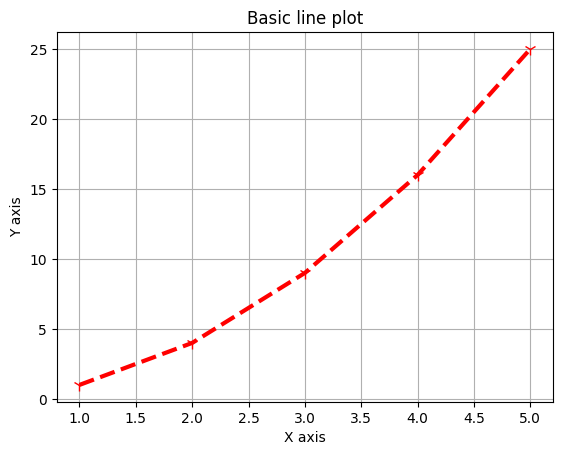

In [5]:
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Basic line plot')
plt.plot(x,y,color='red',linestyle='--',marker='1',linewidth=3,markersize=9)
plt.grid(True)

i. Multiplots

Text(0.5, 1.0, 'Plot 2')

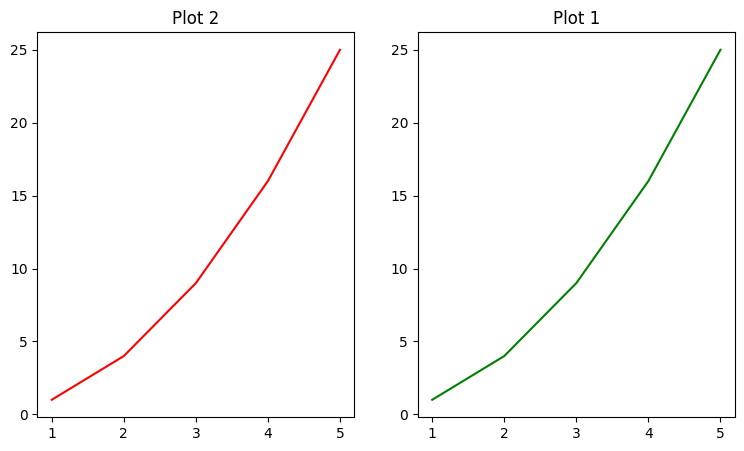

In [8]:

a = np.array([1,2,3,4,5])
b = np.array([1,4,9,16,25])
c = [1,2,3,4,5]
plt.figure(figsize=(9,5))
plt.subplot(1,2,2) # creates a grid of 1 row and 2 columns and places it in the second place (row,column,place)
plt.plot(a,b,color='green')
plt.title("Plot 1")
plt.subplot(1,2,1) # creates a grid of 1 row and 2 columns and places it in the second place (row,column,place)
plt.plot(c,b,color='red')
plt.title("Plot 2")

ii. Bar plot

<BarContainer object of 5 artists>

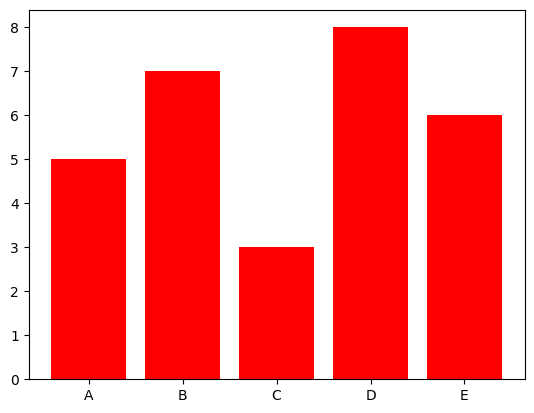

In [9]:
#Used to representing categories
categories = ['A','B','C','D','E']
values = [5,7,3,8,6]
plt.bar(categories,values,color='red')

iii. Histogram

(array([1., 2., 3., 4., 5.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

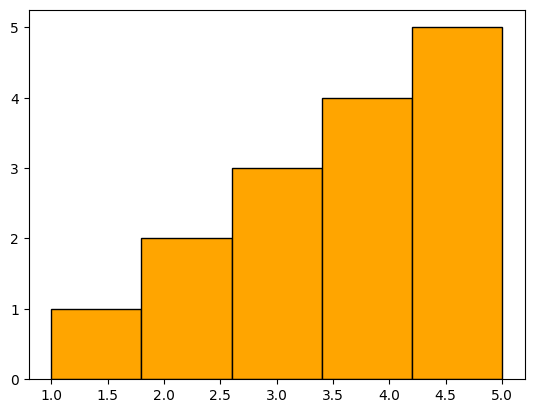

In [10]:
#Used to represent distribution of datasets.Each data is divided into bins and counts number of data points in each bin
data = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5]
plt.hist(data,bins=5,color='orange',edgecolor='black')

iv. Scatterplot

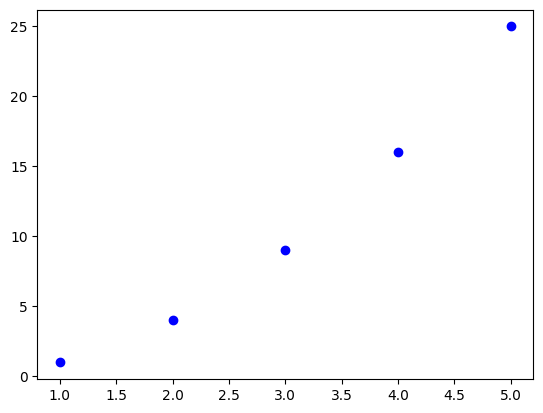

In [13]:
d = [1,2,3,4,5]
e= [2,3,4,5,6]
plt.scatter(x,y,color='blue',marker='o')

v.PyChart

([<matplotlib.patches.Wedge at 0x7a1b5cdd7aa0>,
 [Text(1.4256104075280467, 0.7263848607644003, 'A'),
  Text(0.33991865722907993, 1.0461621798113232, 'B'),
  Text(-0.6465637258945605, 0.8899187313217674, 'C'),
  Text(-1.0864571786893613, 0.17207788607009664, 'D'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'E')],
 [Text(0.9801071551755319, 0.4993895917755252, '15.0%'),
  Text(0.18541017667040724, 0.5706339162607217, '10.0%'),
  Text(-0.35267112321521477, 0.4854102170846003, '20.0%'),
  Text(-0.5926130065578334, 0.09386066512914361, '5.0%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.0%')])

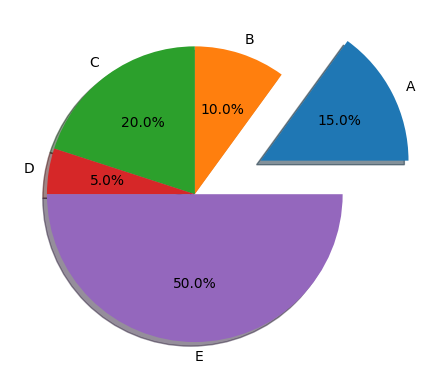

In [17]:
labels = ['A','B','C','D','E']
sizes = [30,20,40,10,100]
color = ['gold','yellow','green','blue']
explode = (0.5,0,0,0,0)
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,explode=explode)
#explode is used to represent the data outside as shown for A.The higher the value space between  the chart and the piece increases
#autopct is format %NoOfDigits before decimal.NoOfDigits after Decimal%%

### O. Seaborn
Seaborn is a Python data visualization library built on top of Matplotlib.
It is used to create beautiful and statistical graphs easily, especially when working with data analysis and data science.
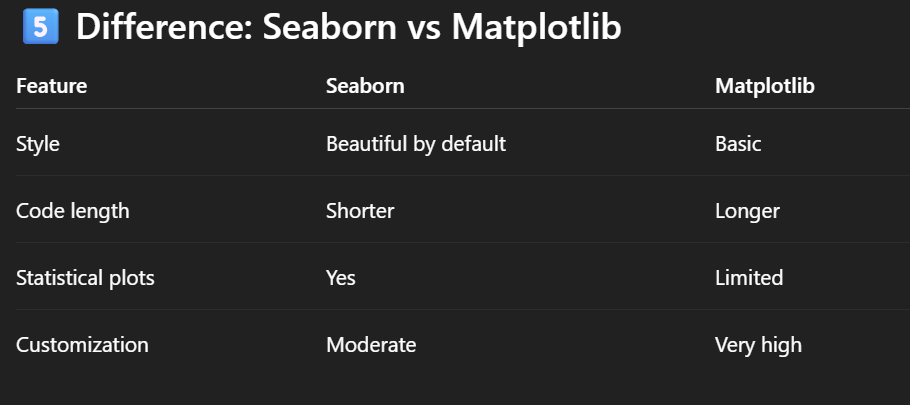

In [18]:
import pandas as pd

student_data = {
    "Student": ["A","B","C","D","E","F","G","H","I","J"],
    "Math": [85,78,92,70,88,95,67,73,90,82],
    "Science": [80,75,89,72,85,93,70,68,88,79],
    "English": [78,82,85,69,90,91,65,74,87,80],
    "Hours_Studied": [5,4,6,3,5,7,2,4,6,5],
    "Gender": ["F","M","M","F","F","M","M","F","F","M"]
}

student_df = pd.DataFrame(student_data)

print(student_df)

  Student  Math  Science  English  Hours_Studied Gender
0       A    85       80       78              5      F
1       B    78       75       82              4      M
2       C    92       89       85              6      M
3       D    70       72       69              3      F
4       E    88       85       90              5      F
5       F    95       93       91              7      M
6       G    67       70       65              2      M
7       H    73       68       74              4      F
8       I    90       88       87              6      F
9       J    82       79       80              5      M


In [19]:
import seaborn as sns

i.Scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

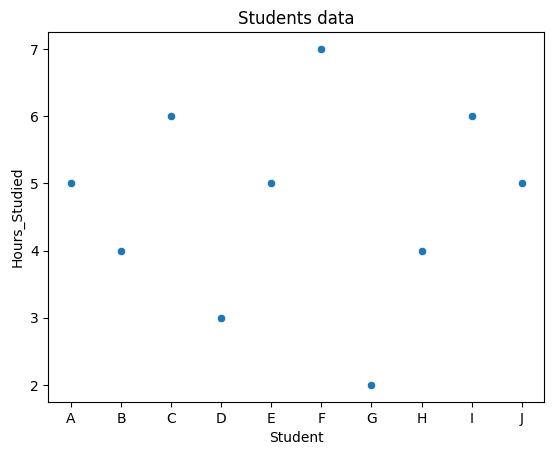

In [20]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Student',y='Hours_Studied',data=student_df)
plt.title("Students data")
plt.show

ii.Line plot

<Axes: xlabel='Student', ylabel='Hours_Studied'>

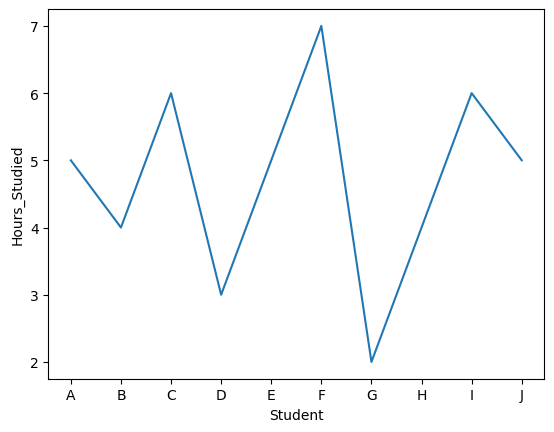

In [21]:
sns.lineplot(x='Student',y='Hours_Studied',data=student_df)

iii.Bar plot

<Axes: xlabel='Gender', ylabel='Hours_Studied'>

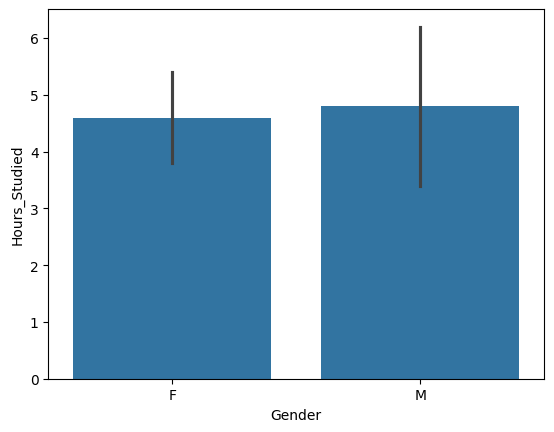

In [22]:
sns.barplot(x='Gender',y='Hours_Studied',data=student_df)

iv. Histogram

<Axes: xlabel='Hours_Studied', ylabel='Count'>

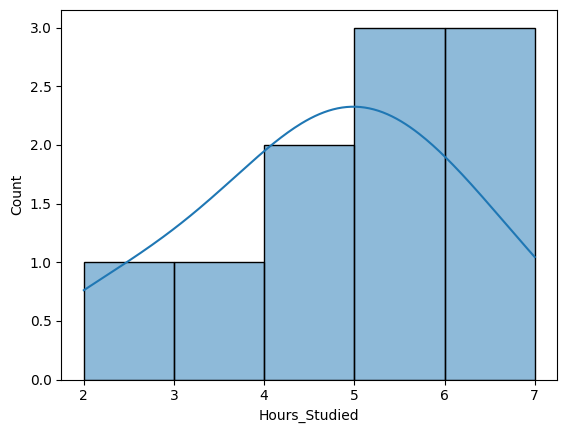

In [26]:
sns.histplot(student_df['Hours_Studied'],fill=True,kde=True)
#KDE stands for Kernel Density Estimation. Adding a KDE to a histogram involves overlaying a smooth, continuous curve that estimates the probability density function of the data, providing a smoothed representation of the distribution